In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Yearbook of Agricultural Statistics/train1.csv")

In [3]:
# Binning the target into 3 classes: Low, Medium, High
df['Production_Class'] = pd.qcut(df['Production (M.Ton)'], q=3, labels=['Low', 'Medium', 'High'])


In [4]:
# Encode categorical features
label_encoders = {}
for col in ['Crop', 'District']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
# Features and target
X = df.drop(columns=['Production (M.Ton)', 'Production_Class'])
y = df['Production_Class']

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Predictions
y_pred = clf.predict(X_test)


In [9]:
# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

Classification Report:

              precision    recall  f1-score   support

        High     0.8783    0.9072    0.8925       334
         Low     0.9396    0.9228    0.9311       337
      Medium     0.8506    0.8385    0.8445       353

    accuracy                         0.8887      1024
   macro avg     0.8895    0.8895    0.8894      1024
weighted avg     0.8889    0.8887    0.8887      1024



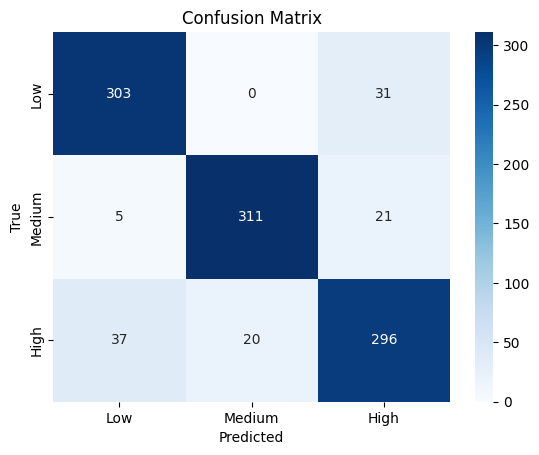

In [10]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()